<a href="https://colab.research.google.com/github/salwaa-hub/worksheet_lstm_machinelearning/blob/main/worksheet_lstm_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salwa Salsabila Daffa'atulhaq - 4.33.23.2.25

1. Uji implementasi LSTM pada data sintetis sederhana (misalnya, pola cosinus atau spiral)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1938
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0365
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0269
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0215
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0128
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7824e-04
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6626e-04
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9815e-04
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0528e-04
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7769e-04
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7348e-04
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3730e-04
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.216

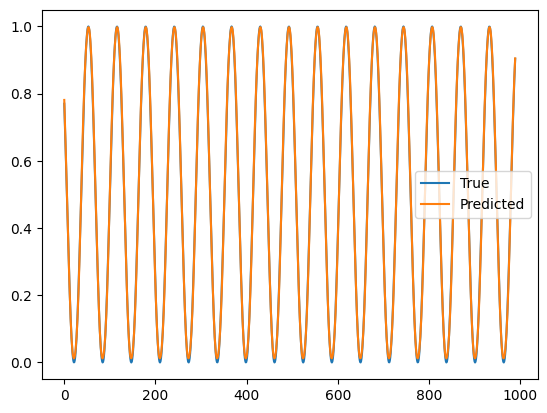

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Generate data: sin atau cos
t = np.arange(0, 100, 0.1)
data = np.cos(t)

# Preprocessing
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

def create_dataset(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled)
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, time_steps, features)

# Contoh model dasar
model = Sequential([
    LSTM(50, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32)

# Plot prediksia
pred = model.predict(X)
plt.plot(y, label='True')
plt.plot(pred, label='Predicted')
plt.legend()
plt.show()

2. Bandingkan berbagai konfigurasi LSTM (ukuran lapisan, jumlah lapisan, dropout rates)

In [ ]:
from itertools import product

units_list = [32, 64]
dropout_list = [0.0, 0.2]
layers_list = [1, 2]

best_loss = float('inf')
best_config = None

for units, dropout, layers in product(units_list, dropout_list, layers_list):
    model = Sequential()
    for i in range(layers):
        model.add(LSTM(units, return_sequences=(i < layers-1), input_shape=(X.shape[1], 1)))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X, y, epochs=10, batch_size=32, verbose=0)

    loss = history.history['loss'][-1]
    if loss < best_loss:
        best_loss = loss
        best_config = (units, dropout, layers)

print("Best config:", best_config, "with loss:", best_loss)

Best config: (64, 0.0, 1) with loss: 7.89001423981972e-05


3. Implementasikan grid search atau random search untuk menemukan hyperparameter
optimal

In [ ]:
# dilakukan ddengan product() dari itertools.
from itertools import product

units_list = [32, 64]
dropout_list = [0.0, 0.2]
layers_list = [1, 2]

best_loss = float('inf')
best_config = None

for units, dropout, layers in product(units_list, dropout_list, layers_list):
    model = Sequential()
    for i in range(layers):
        model.add(LSTM(units, return_sequences=(i < layers-1), input_shape=(X.shape[1], 1)))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X, y, epochs=10, batch_size=32, verbose=0)

    loss = history.history['loss'][-1]
    if loss < best_loss:
        best_loss = loss
        best_config = (units, dropout, layers)

print("Best config:", best_config, "with loss:", best_loss)

Best config: (64, 0.0, 2) with loss: 0.00010897060565184802


4. Analisis pengaruh ukuran batch dan learning rate pada pelatihan LSTM

In [ ]:
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01]

from tensorflow.keras.optimizers import Adam

results = {}
for bs in batch_sizes:
    for lr in learning_rates:
        model = Sequential([
            LSTM(50, input_shape=(X.shape[1], 1)),
            Dense(1)
        ])
        optimizer = Adam(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='mse')
        history = model.fit(X, y, epochs=10, batch_size=bs, verbose=0)
        results[(bs, lr)] = history.history['loss'][-1]

print("Loss berdasarkan batch size dan learning rate:")
for k, v in results.items():
    print(f"Batch {k[0]}, LR {k[1]} => Loss: {v:.4f}")

Loss berdasarkan batch size dan learning rate:
Batch 16, LR 0.001 => Loss: 0.0001
Batch 16, LR 0.01 => Loss: 0.0000
Batch 32, LR 0.001 => Loss: 0.0006
Batch 32, LR 0.01 => Loss: 0.0000
Batch 64, LR 0.001 => Loss: 0.0098
Batch 64, LR 0.01 => Loss: 0.0000


5. Bandingkan berbagai algoritma optimasi (Adam, RMSprop, SGD dengan momentum)
untuk pelatihan LSTM

In [ ]:
from tensorflow.keras.optimizers import RMSprop, SGD

optimizers = {
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'SGD_Momentum': SGD(momentum=0.9)
}

for name, opt in optimizers.items():
    model = Sequential([
        LSTM(50, input_shape=(X.shape[1], 1)),
        Dense(1)
    ])
    model.compile(optimizer=opt, loss='mse')
    history = model.fit(X, y, epochs=10, batch_size=32, verbose=0)
    loss = history.history['loss'][-1]
    print(f"{name}: Final loss = {loss:.4f}")

Adam: Final loss = 0.0005
RMSprop: Final loss = 0.0010
SGD_Momentum: Final loss = 0.0068


6. Analisis tradeoff antara kompleksitas model dan performa (waktu pelatihan, akurasi)

In [ ]:
# Waktu pelatihan: Simpan waktu dengan time.time()
# Kompleksitas model: Cek dengan model.summary()
# Akurasi: Bandingkan loss

import time

start = time.time()
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32, verbose=0)
end = time.time()

print(f"Waktu pelatihan: {end - start:.2f} detik")
model.summary()

Waktu pelatihan: 10.02 detik


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                  │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)